<h2> Introduction/Business Problem </h2>
 
 **"How accurately can we model the severity of accidents in California State based on past accident data covering the US?"**

 
 The US government collects and publishes detailed information about traffic accidents across the country. 
 This information includes, but is not limited to, geographical locations, weather conditions, type of vehicles, accident severity, number of casualties, etc. What this project intends to accomplish is to investigate if there is a relationship and can we accurately model the published accident conditions to the severity of the accidents in California.
 The findings of the project will assist users to understand the risks of operating a vehicle in a knowing the expected conditions in California
 

<h2 id="Data">Data</h2>

This is a countrywide traffic accident dataset, which covers 49 states of the United States. The data contains details of 3.5 million traffic accidents that took place in the United States, from February 2016 to June 2020. There are 49 fields total and 10 Fields containing road and weather conditions that are in concern. Data is collected using several data providers, including two APIs which provide streaming traffic event data. These APIs broadcast traffic events captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks.

**Source Data files:**

• US_Accidents_June20.csv: Every line in the file represents a unique traffic accident (identified by the ID column), featuring various properties related to the accident as columns. Date range: February 2016 to June 2020

• CA_Accidents_2020_150k.csv : Data set for Accidents in CA to predict and validate the accuracy of the machine learning models built. Sample size is 150k records

**Description of the fields:**

| Field |  Description    |
| ----- |  -------------- |
|  ID   | <p align="left justify"> This is a unique identifier of the accident record  </p>|
|Severity| <p align="left justify"> Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic </p>
|       |<p align="left justify">(i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). </p>|
|Description |<p align="left justify">Shows natural language description of the accident. </p>|
|Number|<p align="left justify">Shows the street number in address record. </p>|
|Street| <p align="left justify">Shows the street name in address record. </p>|
|City| <p align="left justify">Shows the city in address record. </p>|
|County|<p align="left justify"> Shows the county in address record. </p>|
|State| <p align="left justify">Shows the state in address record. </p>||
|Zipcode|<p align="left justify"> Shows the zipcode in address record. </p>|
|Country| <p align="left justify">Shows the country in address record. </p>|
|Temperature(F)|<p align="left justify"> Shows the temperature (in Fahrenheit). </p>|
|Wind_Chill(F)| <p align="left justify">Shows the wind chill (in Fahrenheit). </p>|
|Humidity(%)| <p align="left justify">Shows the humidity (in percentage). </p>|
|Pressure(in)|<p align="left justify"> Shows the air pressure (in inches). </p>|
|Visibility(mi)|<p align="left justify"> Shows visibility (in miles). </p>|
|Wind_Direction| <p align="left justify">Shows wind direction. </p>|
|Wind_Speed(mph)|<p align="left justify">Shows wind speed (in miles per hour). </p>|
|Precipitation(in) |<p align="left justify"> Shows precipitation amount in inches, if there is any. </p>|
|Weather_Condition| <p align="left justify">Shows the weather condition (rain, snow, thunderstorm, fog, etc.) </p>|
|Sunrise_Sunset| <p align="left justify">Shows the period of day (i.e. day or night) based on sunrise/sunset. </p>|

<h2 id="Approach">Approach</h2>

Since there are 3.5 Million records abd 49 features the data is sampled to 700K observations and 20 essential features.  

Independent Variables selected:  
>Temperature(F)  
>Humidity(%)  
>Pressure(in)  
>Visibility(mi)  
>Wind_Speed(mph)  
>Precipitation(in)  
>Weather_Condition  
>Sunrise_Sunset  


Dependent Variables: 
>Severity (1 - 4)

*Note: For the interest of the audience the Severity will be categorized in to severe (Severity > 2) and slight (Severity =< 2) as it is assumed to be more comprehensible.*  

**Data preparation**  
• Load data  
• Sample the data   
• Pre-Process the data Check for missing values (NaN) Exploratory Visualization Data Normalization Convert any categorical features to numerical values (Hot encode if need)  
• Feature selection


**Data split**   
• Split the data into Train set and test set

**Classification Models:**  
<li> Decision Tree  </Li>
<li> Logistic Regression (Solver = 'saga' on larger datasets. Reference:https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451 ) </li>
<li> K Nearest Neighbor(KNN) </li>
<li> Support Vector Machine </li>


**Predict and Validate Models**  
• Load data (CA_Accidents_2020_150k.csv)  
• Pre-Process the data  
• Create predictions using the classification models above  
• Validate the accuracy of the models using applicable indexes Jaccard index F1-score LogLoss

In [1]:
# Import Machine learning and data visualization liberaries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import datetime
import types
from botocore.client import Config
#import ibm_boto3

In [2]:
# Impoirt main data set to pandas dataframe
# C:\ProgramData\Capstone_Final_\Data\CA_Accidents_June20.csv
# https://clay-atlas.com/us/blog/2019/10/27/python-english-tutorial-solved-unicodeescape-error-escape-syntaxerror/
df_data_1 = pd.read_csv("C:/ProgramData/Capstone_Final_/Data/US_Accidents_June20.csv")
#Review dataframe
df_data_1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
# Random sample 700,000 rows for machine learning
df_2=df_data_1.sample(n=700000, frac=None, replace=False, weights=None, random_state=None, axis=None)

#Review data
df_2.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,493714.000000,700000.000000,700000.000000,700000.000000,206286.000000,206286.000000,700000.000000,249169.000000,686849.000000,328448.000000,686027.000000,688873.000000,684885.000000,609442.000000,297091.000000
mean,208.055216,2.339953,36.534699,-95.781867,37.542884,-100.418737,0.282593,5989.346592,61.930976,53.549869,65.113340,29.744059,9.119455,8.215948,0.016334
std,20.890323,0.552185,4.886227,17.366080,4.861801,18.541845,1.546226,12094.895331,18.606829,23.735785,22.752118,0.833470,2.877072,5.217854,0.196118
min,200.000000,1.000000,24.571119,-124.623833,24.575237,-124.497410,0.000000,0.000000,-89.000000,-89.000000,1.000000,0.290000,0.000000,0.000000,0.000000
25%,201.000000,2.000000,33.631896,-117.439980,33.990240,-118.344342,0.000000,868.000000,50.000000,35.700000,48.000000,29.730000,10.000000,5.000000,0.000000
50%,201.000000,2.000000,35.902135,-91.024734,37.787140,-97.010333,0.000000,2799.000000,64.000000,57.000000,67.000000,29.950000,10.000000,7.000000,0.000000
75%,201.000000,3.000000,40.305494,-80.930189,41.038563,-82.004152,0.010000,7098.000000,75.900000,72.000000,84.000000,30.090000,10.000000,11.500000,0.000000
max,406.000000,4.000000,49.002201,-67.841858,48.995970,-67.849851,254.399994,990415.000000,168.800000,115.000000,100.000000,57.740000,130.000000,822.800000,10.180000


## Data Visualization

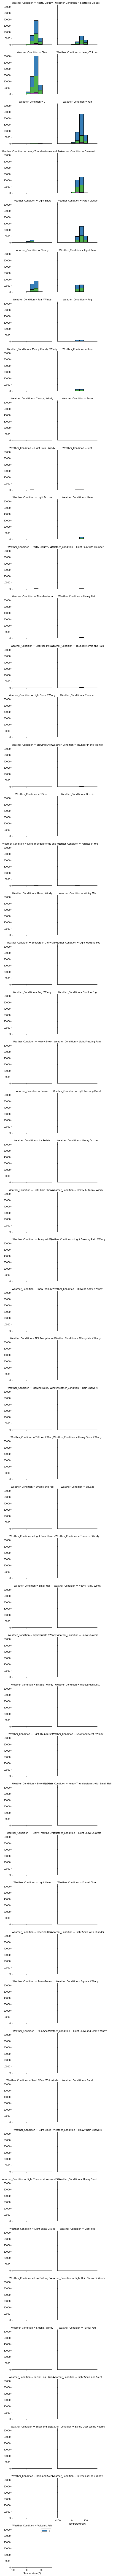

In [96]:
#Visualize Temperature distribution and Accident Severity for all Weather conditions

import seaborn as sns

bins = np.linspace(df_2["Temperature(F)"].min(), df_2["Temperature(F)"].max(), 10)
g = sns.FacetGrid(df_2, col="Weather_Condition", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, "Temperature(F)", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

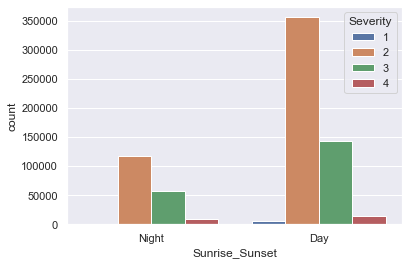

In [108]:
#Visualize Sunrise_Sunset histogram and Accident Severity

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sunrise_Sunset", data=df_2, hue='Severity')

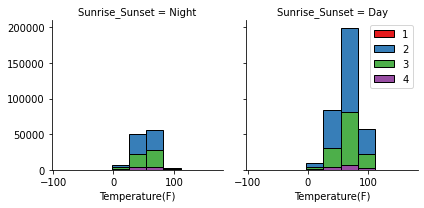

In [97]:
#Visualize Temperature distribution and Accident Severity for Day and Night

df_2['Temperature(F)'].value_counts()
bins = np.linspace(df_2['Temperature(F)'].min(), df_2['Temperature(F)'].max(), 10)
g = sns.FacetGrid(df_2, col="Sunrise_Sunset", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Temperature(F)', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Data pre-processing and Selection

### Data Pre-Processing ##

In [9]:
# Evaluate the counts for type of weather conditions 
df_t=df_2.groupby(['Weather_Condition']).count().sort_values(['ID'], ascending=False)
df_t.head(30)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Clear,160887,160887,125028,160887,160887,160887,160887,160887,35859,35859,...,160887,160887,160887,160887,160887,160887,160884,160884,160884,160884
Fair,108726,108726,63830,108726,108726,108726,108726,108726,44896,44896,...,108726,108726,108726,108726,108726,108726,108721,108721,108721,108721
Mostly Cloudy,97473,97473,69502,97473,97473,97473,97473,97473,27971,27971,...,97473,97473,97473,97473,97473,97473,97471,97471,97471,97471
Overcast,75994,75994,58439,75994,75994,75994,75994,75994,17555,17555,...,75994,75994,75994,75994,75994,75994,75993,75993,75993,75993
Partly Cloudy,68658,68658,48372,68658,68658,68658,68658,68658,20286,20286,...,68658,68658,68658,68658,68658,68658,68654,68654,68654,68654
Cloudy,42764,42764,26055,42764,42764,42764,42764,42764,16709,16709,...,42764,42764,42764,42764,42764,42764,42763,42763,42763,42763
Scattered Clouds,40820,40820,31405,40820,40820,40820,40820,40820,9415,9415,...,40820,40820,40820,40820,40820,40820,40817,40817,40817,40817
Light Rain,35422,35422,24529,35422,35422,35422,35422,35422,10893,10893,...,35422,35422,35422,35422,35422,35422,35419,35419,35419,35419
Light Snow,10034,10034,6674,10034,10034,10034,10034,10034,3360,3360,...,10034,10034,10034,10034,10034,10034,10034,10034,10034,10034


In [10]:
# Re-classify "Weather_Condition" column to new column "Weather" limited to "Clear", Rain/Storm/Snow", "Overcast"

df_2['Weather_Condition'].fillna(0, inplace = True) 
df_2['Weather'] = 'Unknown'
df_2.loc[df_2['Weather_Condition'].str.contains('Clear', na=False),'Weather'] = 'Clear'
Overcast = ['Cloud', 'Overcast', 'Smoke', 'Fair']
 #s[s.str.contains('|'.join(searchfor))]
df_2.loc[df_2['Weather_Condition'].str.contains('|'.join(Overcast), na=False),'Weather'] = 'Overcast'
Severe_Rain =['Rain', 'Thunder', 'Storm', 'Heavy', 'Fog', 'Mist', 'Wind', 'Haze', 'Shower', 'Drizzle', 'T-']
df_2.loc[df_2['Weather_Condition'].str.contains('|'.join(Severe_Rain), na=False),'Weather'] = 'Rain'
Severe_Snow =['Ice', 'Snow', 'Wint', 'Freeze', 'Hail', 'Sleet'] 
df_2.loc[df_2['Weather_Condition'].str.contains('|'.join(Severe_Snow), na=False),'Weather'] = 'Snow'
df_t2=df_2.groupby(['Weather']).count().sort_values(['ID'], ascending=False)
df_t2.head(51)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
Weather,,,,,,,,,,,,,,,,,,,,,
Overcast,435175,435175,298079,435175,435175,435175,435175,435175,137096,137096,...,435175,435175,435175,435175,435175,435175,435159,435159,435159,435159
Clear,160887,160887,125028,160887,160887,160887,160887,160887,35859,35859,...,160887,160887,160887,160887,160887,160887,160884,160884,160884,160884
Rain,76384,76384,52777,76384,76384,76384,76384,76384,23607,23607,...,76384,76384,76384,76384,76384,76384,76380,76380,76380,76380
Unknown,15362,15362,9906,15362,15362,15362,15362,15362,5456,5456,...,15362,15362,15362,15362,15362,15362,15362,15362,15362,15362
Snow,12192,12192,7924,12192,12192,12192,12192,12192,4268,4268,...,12192,12192,12192,12192,12192,12192,12192,12192,12192,12192


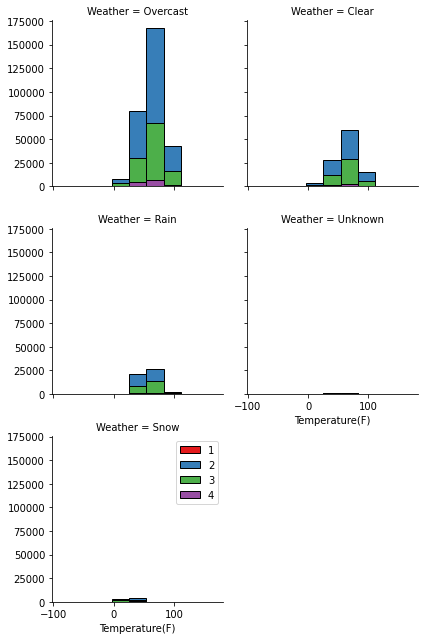

In [11]:

# Re-Visualize the new variables
bins = np.linspace(df_2["Temperature(F)"].min(), df_2["Temperature(F)"].max(), 10)
g = sns.FacetGrid(df_2, col="Weather", hue="Severity", palette="Set1", col_wrap=2)
g.map(plt.hist, "Temperature(F)", bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

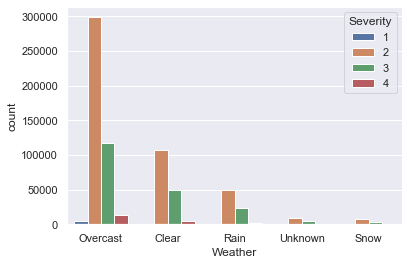

In [105]:
Visualize the overall data set
#https://chrisalbon.com/python/data_wrangling/pandas_with_seaborn/
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Weather", data=df_2, hue='Severity')



In [12]:

#Check for columns with missing data

missing_data = df_2.isnull()

for column in missing_data.columns.values.tolist():
        print (column)
        print (missing_data[column].value_counts())
        print ("") 

ID
False    700000
Name: ID, dtype: int64

Source
False    700000
Name: Source, dtype: int64

TMC
False    493714
True     206286
Name: TMC, dtype: int64

Severity
False    700000
Name: Severity, dtype: int64

Start_Time
False    700000
Name: Start_Time, dtype: int64

End_Time
False    700000
Name: End_Time, dtype: int64

Start_Lat
False    700000
Name: Start_Lat, dtype: int64

Start_Lng
False    700000
Name: Start_Lng, dtype: int64

End_Lat
True     493714
False    206286
Name: End_Lat, dtype: int64

End_Lng
True     493714
False    206286
Name: End_Lng, dtype: int64

Distance(mi)
False    700000
Name: Distance(mi), dtype: int64

Description
False    700000
Name: Description, dtype: int64

Number
True     450831
False    249169
Name: Number, dtype: int64

Street
False    700000
Name: Street, dtype: int64

Side
False    700000
Name: Side, dtype: int64

City
False    699978
True         22
Name: City, dtype: int64

County
False    700000
Name: County, dtype: int64

State
False    700000

In [13]:
#Check Data types
df_2.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [15]:
# Group Temperature by Zipcode and Sunrise_Sunset and Month
# 1.convert Start time to Month
df_3 = df_2
df_3['Start_Time'] = pd.to_datetime(df_3['Start_Time'])
df_3['Year'] = pd.DatetimeIndex(df_3['Start_Time']).year
df_3['Month'] = pd.DatetimeIndex(df_3['Start_Time']).month
df_3['Week'] = pd.DatetimeIndex(df_3['Start_Time']).week
# reset index to get grouped columns back
df_3 = df_3.reset_index()
df_3['Precipitation(in)'].head()


0    NaN
1    NaN
2    NaN
3    NaN
4    0.2
Name: Precipitation(in), dtype: float64

In [16]:
#Backfill NaN values with best estimate

# Referemnce https://stackoverflow.com/questions/46391128/pandas-fillna-using-groupby

# Fill missing values for Temperature(F)

df_3['Temperature(F)'] = df_3.groupby(['State', 'County', 'Year','Week'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_3['Temperature(F)'] = df_3.groupby(['State', 'County','Year', 'Month'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values
df_3['Temperature(F)'] = df_3.groupby(['State', 'County','Year'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values Average for the year
df_3['Temperature(F)'] = df_3.groupby(['State','County'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_3['Temperature(F)'] = df_3.groupby(['State'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Humidity(%)
df_3['Humidity(%)'] = df_3.groupby(['State', 'County', 'Year', 'Week'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_3['Humidity(%)'] = df_3.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Monthly Average
df_3['Humidity(%)'] = df_3.groupby(['State', 'County','Year'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Average for the year
df_3['Humidity(%)'] = df_3.groupby(['State','County'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with  County Averages
df_3['Humidity(%)'] = df_3.groupby(['State'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Pressure(in)
df_3['Pressure(in)'] = df_3.groupby(['State', 'County', 'Year', 'Week'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) #  Fill remaining misssing values with Weekly Average
df_3['Pressure(in)'] = df_3.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) #  Fill remaining misssing values with Monthly Average
df_3['Pressure(in)'] = df_3.groupby(['State', 'County', 'Year'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean()))  # Fill remaining misssing values with County Average for the year
df_3['Pressure(in)'] = df_3.groupby(['State', 'County'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_3['Pressure(in)'] = df_3.groupby(['State'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Visibility(mi)
df_3['Visibility(mi)'] = df_3.groupby(['State', 'County', 'Year','Week'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_3['Visibility(mi)'] = df_3.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with Monthly Average
df_3['Visibility(mi)'] = df_3.groupby(['State', 'County','Year'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Average for the year
df_3['Visibility(mi)'] = df_3.groupby(['State','County'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_3['Visibility(mi)'] = df_3.groupby(['State'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Wind_Speed(mph)
df_3['Wind_Speed(mph)'] = df_3.groupby(['State', 'County', 'Year','Week'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_3['Wind_Speed(mph)'] = df_3.groupby(['State', 'County', 'Year','Month'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with Monthly Average
df_3['Wind_Speed(mph)'] = df_3.groupby(['State', 'County','Year'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_3['Wind_Speed(mph)'] = df_3.groupby(['State','County'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_3['Wind_Speed(mph)'] = df_3.groupby(['State'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# backfill Precipitation
df_3['Precipitation(in)'].fillna(0, inplace = True) 


In [17]:
#Check mean of Precipitation to validate the backfill

df_3['Precipitation(in)'].mean()

0.0069324714285714266

In [18]:
# Check again for missing values
missing_data = df_3.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

index
False    700000
Name: index, dtype: int64

ID
False    700000
Name: ID, dtype: int64

Source
False    700000
Name: Source, dtype: int64

TMC
False    493714
True     206286
Name: TMC, dtype: int64

Severity
False    700000
Name: Severity, dtype: int64

Start_Time
False    700000
Name: Start_Time, dtype: int64

End_Time
False    700000
Name: End_Time, dtype: int64

Start_Lat
False    700000
Name: Start_Lat, dtype: int64

Start_Lng
False    700000
Name: Start_Lng, dtype: int64

End_Lat
True     493714
False    206286
Name: End_Lat, dtype: int64

End_Lng
True     493714
False    206286
Name: End_Lng, dtype: int64

Distance(mi)
False    700000
Name: Distance(mi), dtype: int64

Description
False    700000
Name: Description, dtype: int64

Number
True     450831
False    249169
Name: Number, dtype: int64

Street
False    700000
Name: Street, dtype: int64

Side
False    700000
Name: Side, dtype: int64

City
False    699978
True         22
Name: City, dtype: int64

County
False    700000


In [19]:
# Review dataframe
df_3.describe()

,index,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Week
count,7.000000e+05,493714.000000,700000.000000,700000.000000,700000.000000,206286.000000,206286.000000,700000.000000,249169.000000,700000.000000,328448.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,1.756292e+06,208.055216,2.339953,36.534699,-95.781867,37.542884,-100.418737,0.282593,5989.346592,61.969300,53.549869,65.104856,29.742209,9.117877,8.159289,0.006932,2018.141804,6.516289,26.526576
std,1.014929e+06,20.890323,0.552185,4.886227,17.366080,4.861801,18.541845,1.546226,12094.895331,18.575445,23.735785,22.652652,0.837641,2.861201,4.955563,0.128020,1.240292,3.486166,15.120041
min,0.000000e+00,200.000000,1.000000,24.571119,-124.623833,24.575237,-124.497410,0.000000,0.000000,-89.000000,-89.000000,1.000000,0.290000,0.000000,0.000000,0.000000,2016.000000,1.000000,1.000000
25%,8.768142e+05,201.000000,2.000000,33.631896,-117.439980,33.990240,-118.344342,0.000000,868.000000,50.000000,35.700000,49.000000,29.730000,10.000000,5.000000,0.000000,2017.000000,3.000000,13.000000
50%,1.756052e+06,201.000000,2.000000,35.902135,-91.024734,37.787140,-97.010333,0.000000,2799.000000,64.000000,57.000000,67.000000,29.950000,10.000000,7.306452,0.000000,2018.000000,6.000000,26.000000
75%,2.636472e+06,201.000000,3.000000,40.305494,-80.930189,41.038563,-82.004152,0.010000,7098.000000,75.900000,72.000000,84.000000,30.090000,10.000000,10.400000,0.000000,2019.000000,10.000000,40.000000
max,3.513610e+06,406.000000,4.000000,49.002201,-67.841858,48.995970,-67.849851,254.399994,990415.000000,168.800000,115.000000,100.000000,57.740000,130.000000,822.800000,10.180000,2020.000000,12.000000,52.000000


In [20]:
df_3.head()

,index,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather,Year,Month,Week
0,38463,A-38464,MapQuest,229.0,3,2016-05-12 20:35:30,2016-05-12 21:20:30,37.808121,-122.367249,NaN,...,False,False,Night,Day,Day,Day,Overcast,2016,5,19
1,3306166,A-3306326,Bing,NaN,4,2018-06-08 05:38:27,2018-06-08 11:38:27,29.943820,-95.415500,29.94045,...,False,False,Night,Night,Day,Day,Overcast,2018,6,23
2,2261957,A-2261997,MapQuest,201.0,2,2017-11-20 15:18:59,2017-11-20 16:03:28,30.390270,-97.743164,NaN,...,False,False,Day,Day,Day,Day,Clear,2017,11,47
3,43193,A-43194,MapQuest,201.0,2,2016-06-22 05:42:35,2016-06-22 06:12:35,33.860485,-117.202538,NaN,...,False,False,Day,Day,Day,Day,Clear,2016,6,25
4,3450574,A-3450738,Bing,NaN,2,2019-04-25 16:21:50,2019-04-25 16:51:15,30.514853,-89.108302,30.52009,...,False,False,Day,Day,Day,Day,Rain,2019,4,17


In [21]:
# Feature Selection
Feature = df_3[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather', 'Sunrise_Sunset']]

In [22]:
#Check again for missing values
missing_data = Feature.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Temperature(F)
False    700000
Name: Temperature(F), dtype: int64

Humidity(%)
False    700000
Name: Humidity(%), dtype: int64

Pressure(in)
False    700000
Name: Pressure(in), dtype: int64

Visibility(mi)
False    700000
Name: Visibility(mi), dtype: int64

Wind_Speed(mph)
False    700000
Name: Wind_Speed(mph), dtype: int64

Precipitation(in)
False    700000
Name: Precipitation(in), dtype: int64

Weather
False    700000
Name: Weather, dtype: int64

Sunrise_Sunset
False    699977
True         23
Name: Sunrise_Sunset, dtype: int64



In [23]:
# Hot encode Categorical variable 'Sunrise_Sunset' to Binary
Feature= pd.concat([Feature,pd.get_dummies(df_3['Sunrise_Sunset'])], axis=1)
Feature.drop(['Sunrise_Sunset'], axis = 1,inplace=True)
Feature.head()


,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather,Day,Night
0,57.9,72.0,30.03,10.0,16.100000,0.0,Overcast,0,1
1,75.0,96.0,30.04,10.0,6.461538,0.0,Overcast,0,1
2,69.1,26.0,30.04,10.0,6.900000,0.0,Clear,1,0
3,64.2,62.0,29.92,10.0,1.200000,0.0,Clear,1,0
4,65.0,97.0,29.79,10.0,3.000000,0.2,Rain,1,0


In [24]:
# Hot encode Categorical variable 'Weather' to Binary
Feature= pd.concat([Feature,pd.get_dummies(df_3['Weather'])], axis=1)
Feature.drop(['Weather'], axis = 1,inplace=True)
Feature.head()


,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Day,Night,Clear,Overcast,Rain,Snow,Unknown
0,57.9,72.0,30.03,10.0,16.100000,0.0,0,1,0,1,0,0,0
1,75.0,96.0,30.04,10.0,6.461538,0.0,0,1,0,1,0,0,0
2,69.1,26.0,30.04,10.0,6.900000,0.0,1,0,1,0,0,0,0
3,64.2,62.0,29.92,10.0,1.200000,0.0,1,0,1,0,0,0,0
4,65.0,97.0,29.79,10.0,3.000000,0.2,1,0,0,0,1,0,0


In [25]:
# Normalize Data
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.21906892,  0.30438597,  0.34357401,  0.30830517,  1.60238451,
        -0.05415147, -1.67954054,  1.67968335, -0.54628663,  0.78009505,
        -0.34997947, -0.13313856, -0.14979364],
       [ 0.70150189,  1.36386533,  0.35551231,  0.30830517, -0.34259514,
        -0.05415147, -1.67954054,  1.67968335, -0.54628663,  0.78009505,
        -0.34997947, -0.13313856, -0.14979364],
       [ 0.38387804, -1.7262828 ,  0.35551231,  0.30830517, -0.25411642,
        -0.05415147,  0.59540093, -0.59535031,  1.83054085, -1.28189507,
        -0.34997947, -0.13313856, -0.14979364],
       [ 0.12008875, -0.13706376,  0.21225272,  0.30830517, -1.40433982,
        -0.05415147,  0.59540093, -0.59535031,  1.83054085, -1.28189507,
        -0.34997947, -0.13313856, -0.14979364],
       [ 0.16315639,  1.4080103 ,  0.05705483,  0.30830517, -1.04111138,
         1.50810443,  0.59540093, -0.59535031, -0.54628663, -1.28189507,
         2.85731043, -0.13313856, -0.14979364]])

In [26]:
# Regroup the data ( Severity=1 and 2 to be Severity =0, Severity=3 and 4 to be Severity =1)
df_3.loc[df_3['Severity'] <= 2, 'Severity_bool'] = 0
df_3.loc[df_3['Severity'] > 2, 'Severity_bool'] = 1
df_3['Severity_bool'].head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Severity_bool, dtype: float64

In [27]:
# validate y for new boolean values
y=df_3['Severity_bool'].values
y[0:5]


array([1., 1., 0., 0., 0.])

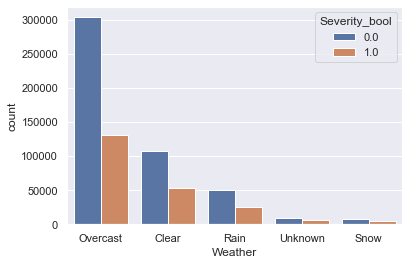

In [107]:
# Re-visualize the data with new severity values

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Weather", data=df_3, hue='Severity_bool')


## Classification

In [28]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (630000, 13) (630000,)
Test set: (70000, 13) (70000,)


## Modelling
### Decision Tree model

In [29]:
from sklearn.tree import DecisionTreeClassifier
#DT_model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model = DecisionTreeClassifier(criterion="entropy")
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(criterion=&#39;entropy&#39;)

In [30]:
#Predict DT Model
yhat_DT_Model = DT_model.predict(X_test)
yhat_DT_Model

array([0., 0., 0., ..., 1., 0., 0.])

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, solver=&#39;saga&#39;)

In [32]:
#Predict using LR Model
yhat_LR_Model = LR_model.predict(X_test)
yhat_LR_Model

array([0., 0., 0., ..., 0., 0., 0.])

### K Nearest Neighbor(KNN) Model

In [34]:
# Modeling kNN Model

from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model 
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [35]:
# Predict using kNN Model

kNN_yhat = kNN_model.predict(X_test)
kNN_yhat[0:5]


array([0., 0., 0., 1., 0.])

In [36]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.60754286, 0.66304286, 0.6216    , 0.6614    , 0.63558571,
       0.6625    , 0.64495714, 0.6647    , 0.65148571, 0.66814286,
       0.65684286, 0.66985714, 0.66212857, 0.67252857])

In [38]:
# Further iterations to find a better k
Ks=25
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(15,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.66434286,
       0.67305714, 0.66592857, 0.67431429, 0.66911429, 0.67665714,
       0.67174286, 0.67691429, 0.67327143, 0.67807143])

In [37]:
# Building the model again, using k=15 after inspecting results above
from sklearn.neighbors import KNeighborsClassifier
k = 15
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=14)

### Support Vector Machine

In [67]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 
yhat = SVM_model.predict(X_test)
yhat

array([0., 0., 0., ..., 0., 0., 0.])

## Prediction and Model Evaluation 

In [39]:
# Import model evaluation modules
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [41]:
# Read California data to predict
df_predict = pd.read_csv("C:/ProgramData/Capstone_Final_/Data/CA_Accidents_June20.csv")
df_predict.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-512452,MapQuest,201.0,2,2020-05-24 19:21:05,2020-05-24 21:01:55,37.367020,-119.630409,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-512453,MapQuest-Bing,201.0,3,2020-05-24 04:09:23,2020-05-24 06:09:29,37.786991,-122.389854,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-512454,MapQuest,201.0,2,2020-05-24 09:06:20,2020-05-24 10:36:06,39.464001,-121.578888,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-512455,MapQuest,201.0,3,2020-05-24 13:47:13,2020-05-24 14:48:34,37.808647,-122.366608,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-512456,MapQuest,201.0,3,2020-05-24 13:58:29,2020-05-24 15:17:04,37.750683,-122.151794,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day


### Pre-Process Predict Dataframe

In [42]:
df_predict['Start_Time'] = pd.to_datetime(df_predict['Start_Time'])
df_predict['Year'] = pd.DatetimeIndex(df_predict['Start_Time']).year
df_predict['Month'] = pd.DatetimeIndex(df_predict['Start_Time']).month
df_predict['Week'] = pd.DatetimeIndex(df_predict['Start_Time']).week
# reset index to get grouped columns back
df_predict =df_predict.reset_index()
df_predict['Precipitation(in)'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Precipitation(in), dtype: float64

In [109]:
df_predict.shape


(150000, 55)

In [110]:
df_t=df_predict.groupby(['Weather_Condition']).count().sort_values(['ID'], ascending=False)
df_t.head(30)

,index,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Week,Weather,Severity_bool
Weather_Condition,,,,,,,,,,,,,,,,,,,,,
Fair,74428,74428,74428,18130,74428,74428,74428,74428,74428,56298,...,74428,74427,74427,74427,74427,74428,74428,74428,74428,74428
Cloudy,20893,20893,20893,5260,20893,20893,20893,20893,20893,15633,...,20893,20893,20893,20893,20893,20893,20893,20893,20893,20893
Mostly Cloudy,16723,16723,16723,4100,16723,16723,16723,16723,16723,12623,...,16723,16723,16723,16723,16723,16723,16723,16723,16723,16723
Partly Cloudy,14011,14011,14011,3517,14011,14011,14011,14011,14011,10494,...,14011,14011,14011,14011,14011,14011,14011,14011,14011,14011
Light Rain,7947,7947,7947,1721,7947,7947,7947,7947,7947,6226,...,7947,7946,7946,7946,7946,7947,7947,7947,7947,7947
0,3406,3406,3406,922,3406,3406,3406,3406,3406,2484,...,3406,3406,3406,3406,3406,3406,3406,3406,3406,3406
Haze,3295,3295,3295,882,3295,3295,3295,3295,3295,2413,...,3295,3295,3295,3295,3295,3295,3295,3295,3295,3295
Rain,3157,3157,3157,595,3157,3157,3157,3157,3157,2562,...,3157,3157,3157,3157,3157,3157,3157,3157,3157,3157
Fog,1990,1990,1990,740,1990,1990,1990,1990,1990,1250,...,1990,1990,1990,1990,1990,1990,1990,1990,1990,1990


In [43]:
# Re-classify "Weather_Condition" column to new column "Weather" limited to "Clear", Rain/Storm/Snow", "Overcast"

df_predict['Weather_Condition'].fillna(0, inplace = True) 
df_predict['Weather'] = 'Unknown'
df_predict.loc[df_predict['Weather_Condition'].str.contains('Clear', na=False),'Weather'] = 'Clear'
Overcast = ['Cloud', 'Overcast', 'Smoke', 'Fair']
df_predict.loc[df_predict['Weather_Condition'].str.contains('|'.join(Overcast), na=False),'Weather'] = 'Overcast'
Severe_Rain =['Rain', 'Thunder', 'Storm', 'Heavy', 'Fog', 'Mist', 'Wind', 'Haze', 'Shower', 'Drizzle', 'T-']
df_predict.loc[df_predict['Weather_Condition'].str.contains('|'.join(Severe_Rain), na=False),'Weather'] = 'Rain'
Severe_Snow =['Ice', 'Snow', 'Wint', 'Freeze', 'Hail', 'Sleet'] 
df_predict.loc[df_predict['Weather_Condition'].str.contains('|'.join(Severe_Snow), na=False),'Weather'] = 'Snow'
df_t2=df_predict.groupby(['Weather']).count().sort_values(['ID'], ascending=False)
df_t2.head(51)

,index,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Week
Weather,,,,,,,,,,,,,,,,,,,,,
Overcast,126068,126068,126068,31009,126068,126068,126068,126068,126068,95059,...,126068,126068,126068,126067,126067,126067,126067,126068,126068,126068
Rain,20081,20081,20081,4647,20081,20081,20081,20081,20081,15434,...,20081,20081,20081,20080,20080,20080,20080,20081,20081,20081
Unknown,3431,3431,3431,927,3431,3431,3431,3431,3431,2504,...,3431,3431,3431,3431,3431,3431,3431,3431,3431,3431
Snow,420,420,420,49,420,420,420,420,420,371,...,420,420,420,420,420,420,420,420,420,420


In [44]:

# Backfill NaN fields using gouped mean values as the best estimate

# Fill missing values for Temperature(F)
df_predict['Temperature(F)'] = df_predict.groupby(['State', 'County', 'Year','Week'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_predict['Temperature(F)'] = df_predict.groupby(['State', 'County','Year', 'Month'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with Monthly Average
df_predict['Temperature(F)'] = df_predict.groupby(['State', 'County','Year'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Average for the year
df_predict['Temperature(F)'] = df_predict.groupby(['State','County'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_predict['Temperature(F)'] = df_predict.groupby(['State'], sort=False)['Temperature(F)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Humidity(%)
df_predict['Humidity(%)'] = df_predict.groupby(['State', 'County', 'Year', 'Week'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_predict['Humidity(%)'] = df_predict.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Monthly Average
df_predict['Humidity(%)'] = df_predict.groupby(['State', 'County','Year'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Average for the year
df_predict['Humidity(%)'] = df_predict.groupby(['State','County'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with  County Averages
df_predict['Humidity(%)'] = df_predict.groupby(['State'], sort=False)['Humidity(%)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Pressure(in)
df_predict['Pressure(in)'] = df_predict.groupby(['State', 'County', 'Year', 'Week'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) #  Fill remaining misssing values with Weekly Average
df_predict['Pressure(in)'] = df_predict.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) #  Fill remaining misssing values with Monthly Average
df_predict['Pressure(in)'] = df_predict.groupby(['State', 'County', 'Year'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean()))  # Fill remaining misssing values with County Average for the year
df_predict['Pressure(in)'] = df_predict.groupby(['State', 'County'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_predict['Pressure(in)'] = df_predict.groupby(['State'], sort=False)['Pressure(in)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Visibility(mi)
df_predict['Visibility(mi)'] = df_predict.groupby(['State', 'County', 'Year','Week'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_predict['Visibility(mi)'] = df_predict.groupby(['State', 'County', 'Year', 'Month'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with Monthly Average
df_predict['Visibility(mi)'] = df_predict.groupby(['State', 'County','Year'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Average for the year
df_predict['Visibility(mi)'] = df_predict.groupby(['State','County'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_predict['Visibility(mi)'] = df_predict.groupby(['State'], sort=False)['Visibility(mi)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages

# Fill missing values for Wind_Speed(mph)
df_predict['Wind_Speed(mph)'] = df_predict.groupby(['State', 'County', 'Year','Week'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill misssing values with Weekly Average
df_predict['Wind_Speed(mph)'] = df_predict.groupby(['State', 'County', 'Year','Month'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with Monthly Average
df_predict['Wind_Speed(mph)'] = df_predict.groupby(['State', 'County','Year'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_predict['Wind_Speed(mph)'] = df_predict.groupby(['State','County'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with County Averages
df_predict['Wind_Speed(mph)'] = df_predict.groupby(['State'], sort=False)['Wind_Speed(mph)'].apply(lambda x: x.fillna(x.mean())) # Fill remaining misssing values with State Averages


In [45]:
# Backfill Precipitation NaN values

df_predict['Precipitation(in)'].fillna(0, inplace = True) 

In [46]:
df_predict.shape

(150000, 54)

In [47]:
# Check for missing data
missing_data = df_predict.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

index
False    150000
Name: index, dtype: int64

ID
False    150000
Name: ID, dtype: int64

Source
False    150000
Name: Source, dtype: int64

TMC
True     113368
False     36632
Name: TMC, dtype: int64

Severity
False    150000
Name: Severity, dtype: int64

Start_Time
False    150000
Name: Start_Time, dtype: int64

End_Time
False    150000
Name: End_Time, dtype: int64

Start_Lat
False    150000
Name: Start_Lat, dtype: int64

Start_Lng
False    150000
Name: Start_Lng, dtype: int64

End_Lat
False    113368
True      36632
Name: End_Lat, dtype: int64

End_Lng
False    113368
True      36632
Name: End_Lng, dtype: int64

Distance(mi)
False    150000
Name: Distance(mi), dtype: int64

Description
False    150000
Name: Description, dtype: int64

Number
True     115194
False     34806
Name: Number, dtype: int64

Street
False    150000
Name: Street, dtype: int64

Side
False    150000
Name: Side, dtype: int64

City
False    149998
True          2
Name: City, dtype: int64

County
False    150000


### Feature Selection and Normalization



In [48]:

# Feature selection
Feature_predict = df_predict[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather', 'Sunrise_Sunset']]
Feature_predict= pd.concat([Feature_predict,pd.get_dummies(Feature_predict['Weather'])], axis=1)
Feature_predict.drop(['Weather'], axis = 1,inplace=True)

In [49]:
Feature_predict.shape

(150000, 11)

In [ ]:
#check for missing data 

missing_data = Feature_predict.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

In [50]:
Feature_predict= pd.concat([Feature_predict,pd.get_dummies(Feature_predict['Sunrise_Sunset'])], axis=1)
Feature_predict.drop(['Sunrise_Sunset'], axis = 1,inplace=True)
Feature_predict.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Overcast,Rain,Snow,Unknown,Day,Night
0,87.0,22.0,29.59,10.0,6.0,0.0,1,0,0,0,1,0
1,57.0,77.0,29.98,10.0,0.0,0.0,1,0,0,0,0,1
2,72.0,41.0,29.80,10.0,0.0,0.0,1,0,0,0,1,0
3,82.0,38.0,29.95,10.0,8.0,0.0,1,0,0,0,1,0
4,82.0,38.0,29.95,10.0,8.0,0.0,1,0,0,0,1,0


In [58]:
Feature_predict.shape

(150000, 12)

In [51]:
Feature_predict.fillna(0)
Feature_predict.describe

&lt;bound method NDFrame.describe of         Temperature(F)  Humidity(%)  Pressure(in)  Visibility(mi)  \
0                 87.0         22.0         29.59            10.0   
1                 57.0         77.0         29.98            10.0   
2                 72.0         41.0         29.80            10.0   
3                 82.0         38.0         29.95            10.0   
4                 82.0         38.0         29.95            10.0   
...                ...          ...           ...             ...   
149995            83.0          8.0         29.18            10.0   
149996            82.0         13.0         29.30            10.0   
149997            81.0         18.0         29.83            10.0   
149998            74.0         20.0         29.99            10.0   
149999            77.0         23.0         29.97            10.0   

        Wind_Speed(mph)  Precipitation(in)  Overcast  Rain  Snow  Unknown  \
0                   6.0                0.0         1     

In [52]:
# Regroup the data ( Severity=1 and 2 to be Severity =0, Severity=3 and 4 to be Severity =1)
df_predict.loc[df_predict['Severity'] <= 2, 'Severity_bool'] = 0
df_predict.loc[df_predict['Severity'] > 2, 'Severity_bool'] = 1
df_predict['Severity_bool'].head()

0    0.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Severity_bool, dtype: float64

In [53]:
y_predict=df_predict['Severity_bool'].values
y_predict[0:5]

array([0., 1., 0., 1., 1.])

In [54]:
# Check for missing columns

train_cols = Feature.columns
test_cols = Feature_predict.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)
train_not_test


Index([&#39;Clear&#39;], dtype=&#39;object&#39;)

In [55]:
#Re-index to match train set columns and drop rows with no data

Feature_predict2 = Feature_predict.reindex_like(Feature)
Feature_predict2.head()

# Drop excess columns
Feature_predict2=Feature_predict2.dropna(subset=['Temperature(F)'])


In [56]:
Feature_predict2=Feature_predict2.fillna(0)
Feature_predict2

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Day,Night,Clear,Overcast,Rain,Snow,Unknown
0,87.0,22.0,29.59,10.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57.0,77.0,29.98,10.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,72.0,41.0,29.80,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,82.0,38.0,29.95,10.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,82.0,38.0,29.95,10.0,8.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,83.0,8.0,29.18,10.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
149996,82.0,13.0,29.30,10.0,12.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
149997,81.0,18.0,29.83,10.0,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
149998,74.0,20.0,29.99,10.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [60]:
# Normalize
X_predict = Feature_predict2
X_predict = preprocessing.StandardScaler().fit(X_predict).transform(X_predict)
X_predict[0:5]

array([[ 2.02818368, -1.65317144,  0.05668024,  0.32731701, -0.0677273 ,
        -0.179602  ,  0.69346697, -0.69344589,  0.        ,  0.4356995 ,
        -0.39314824, -0.05298926, -0.15299925],
       [-0.40154026,  0.71947861,  0.53973564,  0.32731701, -1.15305055,
        -0.179602  , -1.44202975,  1.44207359,  0.        ,  0.4356995 ,
        -0.39314824, -0.05298926, -0.15299925],
       [ 0.81332171, -0.83352869,  0.31678699,  0.32731701, -1.15305055,
        -0.179602  ,  0.69346697, -0.69344589,  0.        ,  0.4356995 ,
        -0.39314824, -0.05298926, -0.15299925],
       [ 1.62322969, -0.96294597,  0.50257753,  0.32731701,  0.29404711,
        -0.179602  ,  0.69346697, -0.69344589,  0.        ,  0.4356995 ,
        -0.39314824, -0.05298926, -0.15299925],
       [ 1.62322969, -0.96294597,  0.50257753,  0.32731701,  0.29404711,
        -0.179602  ,  0.69346697, -0.69344589,  0.        ,  0.4356995 ,
        -0.39314824, -0.05298926, -0.15299925]])

In [77]:
# Decision tree prediction and model evaluation for CA

DT_yhat_predict = DT_model.predict(X_predict)
print("DT Jaccard index: %.2f" % jaccard_score(y_predict, DT_yhat_predict))
print("DT F1-score: %.2f" % f1_score(y_predict, DT_yhat_predict, average='weighted') )

DT Jaccard index: 0.09
DT F1-score: 0.69


In [68]:
# Logistic Regression prediction and model evaluation for CA

LR_yhat_predict = LR_model.predict(X_predict)
LR_yhat_predict_prob = LR_model.predict_proba(X_predict)
print("LR Jaccard index: %.2f" % jaccard_score(y_predict, LR_yhat_predict))
print("LR F1-score: %.2f" % f1_score(y_predict, LR_yhat_predict, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_predict, LR_yhat_predict_prob))

LR Jaccard index: 0.00
LR F1-score: 0.84
LR LogLoss: 0.47


In [69]:
# Predict using KNN where K=15
KNN_yhat_predict = kNN_model.predict(X_predict)
print("KNN Jaccard index: %.2f" % jaccard_score(y_predict, KNN_yhat_predict))
print("KNN F1-score: %.2f" % f1_score(y_predict, KNN_yhat_predict, average='weighted') )

KNN Jaccard index: 0.03
KNN F1-score: 0.83


In [73]:
# Predict and check model accuracy for Support Vector Machine Model
SVM_yhat_predict = SVM_model.predict(X_predict)
print("SVM Jaccard index: %.2f" % jaccard_score(y_predict, SVM_yhat_predict))
print("SVM F1-score: %.2f" % f1_score(y_predict, SVM_yhat_predict, average='weighted') )


SVM Jaccard index: 0.00
SVM F1-score: 0.84


## Visualization of the different models and accuracy

In [63]:

# Confusion Matrix calculation method

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


[[ 5734 10938]
 [45594 87734]]


Confusion matrix, without normalization
[[ 5734 10938]
 [45594 87734]]


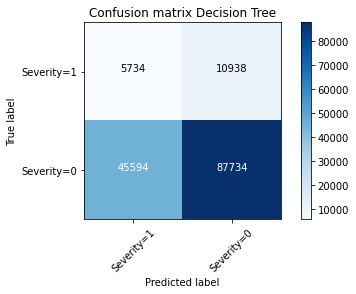

In [85]:
# Confusion Matrix Calculation and Plot for Decision Tree

cnf_matrix_dt = confusion_matrix(y_predict, DT_yhat_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_dt, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix Decision Tree')

Confusion matrix, without normalization
[[     2  16670]
 [    69 133259]]


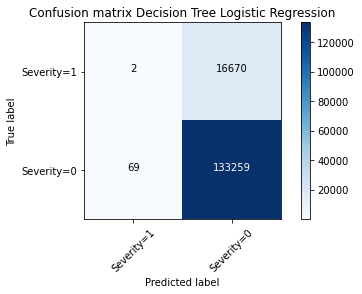

In [87]:
# Confusion Matrix Plot for Logistitc Regression Model

cnf_matrix_LR = confusion_matrix(y_predict, LR_yhat_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_LR, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix Decision Tree Logistic Regression')

Confusion matrix, without normalization
[[   615  16057]
 [  4658 128670]]


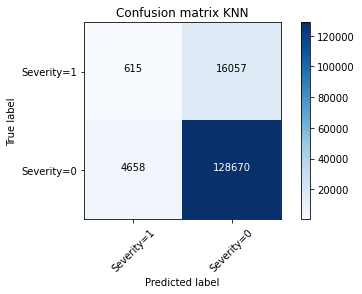

In [88]:
# Confusion Matrix Plot for KNN Model

cnf_matrix_KNN = confusion_matrix(y_predict, KNN_yhat_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_KNN, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix KNN')

Confusion matrix, without normalization
[[     4  16668]
 [    66 133262]]


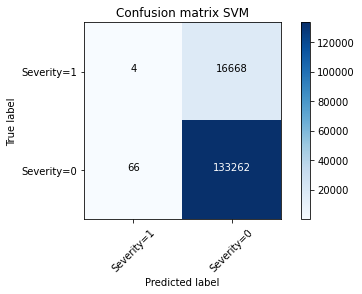

In [89]:
# Confusion Matrix Plot for SVM Model

cnf_matrix_SVM = confusion_matrix(y_predict, SVM_yhat_predict, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_SVM, classes=['Severity=1','Severity=0'],normalize= False,  title='Confusion matrix SVM')

<h1>Observations</h1>
<b> Decision Tree Model </b> 
    -Jaccard index: 0.09 /  F1-score: 0.69 
    -Slightly better model to estimate a severe accident but a better model to estimate less severe accident  due to weather condition

<b> Logistic Regression </b>
    -Jaccard index: 0.00 LR F1-score: 0.84 LR LogLoss: 0.47
    - Low accuracy predicting a severe accident (3, 4) but higher accuracy for predicting a less severe accident (1, 2)

<b> K Nearest Neighbor </b>
    - Jaccard index: 0.03 KNN F1-score: 0.83
    - Low accuracy predicting a severe accident (3, 4) but higher accuracy for predicting a less severe accident (1, 2)

<b> Support Vector Machine </b>
    - Jaccard index: 0.00 SVM F1-score: 0.84
    - Low accuracy predicting a severe accident (3, 4) but higher accuracy for predicting a less severe accident (1, 2)


<h1>Conclusion</h1>

Per the four models above, the accuracy levels of predicting a severity or 3 and 4 level accident is at its lowest levels. However, all models suggest that the accuracy of predicting a severity 1 or 2 is very high. 

In conclusion, this project can be summarized as follows
    To answer the business problem, yes, it is possible to model and predict accident severity of California based on US National data up to a severity of low to medium.

<h1>Suggestions</h1>
Following suggestions can be made based on the data and the predictions
<oi>
<div>
        <li>Use localized samples for train model. E.g.: CA only train/test data</li>
        <li>Increase the number of samples out of US National data</li>
        <li>Use Test/Train data set with more samples to represent all combinations of the output </li>
        <li>Increase the number of samples to predict from CA</li>
        <li>Revisit the weather condition grouping for better grouping</li>
        <li>Run separate model for measurable values such as Temperature / Pressure etc.</li>
        <li>Run separate model for weather condition</li>
    </ol>
</div>
<br>
<hr>
